Week1 Test
==========

1.
--

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#2.TODO: missingData 함수를 완성합니다.
def missingData(data):
    """
    dataframe을 입력값으로 받아 dictionary를 리턴합니다.
    """
    missing_data = {}
    
    # 누락된 데이터의 비율을 계산합니다.
    total = data.isnull().sum() #(1) TODO: 누락된 데이터의 개수가 값인 pd series
    na_ratio = total/len(data) #(2) TODO: (누락된 데이터수 / 총 데이터 개수)가 값인 pd series
    
    #(3) TODO: 칼럼이름과 누락된 데이터의 비율을 dictionary에 추가합니다. (누락된 데이터가 있는 칼럼만 추가되어야 합니다.)
    for column, item in na_ratio.items():
        if item != 0:
            missing_data[column] = item
    
    return missing_data


def check_isnum(data, column):
    """
    data의 해당 column이 숫자값을 가지는지 판단하는 함수입니다.
    """
    isnum = False
    
    if data[column].dtype in ['int64', 'float64']:
        isnum = True
        
    return isnum

#3.TODO: missing_filler(data)함수를 완성해 누락된 데이터를 적절한 값으로 채웁니다.
def missing_filler(data):
    """
    data의 누락된 부분을 채우는 함수입니다.
    """
    missing_data = missingData(data)
    
    for column in missing_data.keys():
        isnum = check_isnum(data, column)
        
        if isnum:
            #(1) TODO: 누락된 데이터를 칼럼의 평균값으로 채웁니다.
            mean_value = data[column].mean()
            data[column].fillna(mean_value, inplace = True)
#             data[column] = data[column].fillna(np.mean(column))
        else:
            #(2) TODO: 누락된 데이터를 'Unknown'으로 채웁니다.
            data[column].fillna('Unknown', inplace = True)
#             data[column] = data[column].fillna('Unknown')
        
    return data


def column_plotter(data, column):
    """
    data에서 특정 column의 값들을 막대그래프로 그립니다. 
    """

    #5.TODO: column의 데이터 별 개수를 세어보고 bar 그래프를 만들어 봅니다. 
    data = data[column].value_counts() #pd.Series.value_counts 함수를 이용
    barplot = data.plot.bar() # bar 그래프를 만들고 변수 barplot에 이를 저장합니다. 
    barplot = data.plot(kind = 'bar', color = 'r', align = 'center')
    
    if barplot is not None:
        fig = barplot.get_figure()
        fig.tight_layout()
        fig.savefig('pictures/barplot.png')
        
    return fig

def main():

    #1.TODO: pandas를 이용해 data폴더 안의 csv파일을 불러옵니다.
    data = pd.read_csv('datasets/missing_migrants.csv')
    
    # print(data) # data 불러오기 확인
    # print(missingData(data)) # missingData 함수 동작 확인
    data = missing_filler(data)
    # print(data) # missing_filler 함수 동작 확인
    column_plotter(data, 'Cause of Death')
    
    
if __name__ == "__main__":
    main()

2.
---

Central Mediterranean    483
Western Mediterranean    234
Eastern Mediterranean    222
Name: Migration Route, dtype: int64


<Figure size 432x288 with 0 Axes>

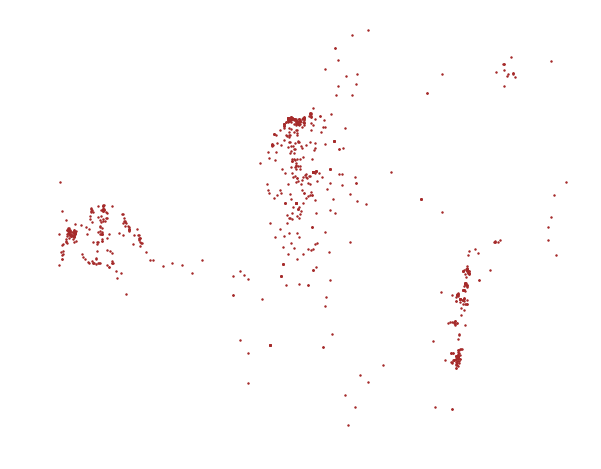

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def medite_collector(data):
    """
    dataframe에서 지중해(Mediterranean)지역의 사건에 해당하는 행만 추출해 리턴합니다.
    """
    #1.TODO: 사건발생장소가 지중해(Mediterranean)인 행을 가져옵니다.
    medite = data.loc[data['Region of Incident'] == 'Mediterranean']

    
    #2.TODO: 가져온 행 중에서 2019년 이전 데이터를 가져옵니다.
    medite = medite.loc[data['Reported Year'] < 2019]
    
    # 사건장소의 좌표를 위도와 경도로 구분해 저장합니다.
    if medite is not None:
        latitude = medite['Location Coordinates'].str.split(', ').str.get(0)
        longitude = medite['Location Coordinates'].str.split(', ').str.get(1)
    
        #3.TODO: medite에 'Lat', 'Lon' column들을 만들어 위도값과 경로값을 할당해 보세요.
        medite['Lat'] = latitude
        medite['Lon'] = longitude
    
    return medite
    
    
def plotter(medite):
    """
    지중해 지도 위에 데이터를 시각화하는 함수입니다.
    """
    
    medite.Lat = medite.Lat.astype(float) # 값을 실수로 변환
    medite.Lon = medite.Lon.astype(float)
    lat = np.array(medite['Lat']) # 값을 numpy array로 변환
    lon = np.array(medite['Lon'])
    img = plt.figure() # 이미지 생성
    
#     img = plt.imread("./basemap.png") # 지도 이미지 받아오기
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')
#     ax.imshow(img)
    lon = 13.0*lon + 155 # 지도의 축적에 맞게 좌표값을 조정
    lat = -14.5*lat + 787
    ax.scatter(lon, lat, marker='o', c='brown', s=2) # 지도 위에 그래프 그리기
    fig.savefig('pictures/incident_map.png',edgecolor='k') # 그래프 저장    


def main():
    #4.TODO: data 폴더에서 csv파일을 불러옵니다.
    data = pd.read_csv('datasets/missing_migrants_clean.csv')
    #print(data) # 데이터 불러오기 확인
    
    medite = medite_collector(data)
    #print(medite) # medit_collector 함수 동작 확인
    
    if medite is not None:
        print(medite['Migration Route'].value_counts()) # 이주경로별 사망자 및 실종자수
        medite.to_csv('./medite_data.csv', index=False)
        
    #5.TODO: plotter함수를 이용해 그래프를 그립니다.
    plotter(medite)
    
    
if __name__ == "__main__":
    main()

3.
---

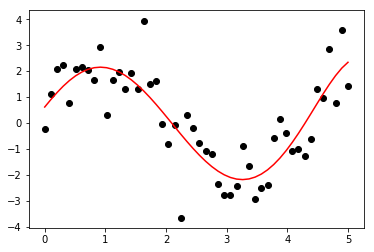

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def sample(size):
    np.random.seed(2019)

    x = np.linspace(0, 5, size) # x 값을 생성합니다.  
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size) # y = 2 * sin(1.5x) + e 을 생성합니다.
    
    return x, y
    
def get_regression_model():
    '''
    다항 회귀 모델을 생성합니다.
    '''
    #1.TODO: Linear Regression 모델을 생성합니다.
    model = LinearRegression()

    return model
    
def fit_regression_model(model, x, y):
    '''
    다항 회귀 모델을 fitting 합니다.
    '''
    #2.TODO: 모델의 차수를 5로 설정합니다. 
    degree = 5
    fitted_model = model.fit(np.vander(x, degree + 1), y)

    return fitted_model

def apply_polynomial(model, x):
    '''
    input 데이터에 학습된 모델을 적용합니다.
    
    model: 다항 회귀 모델
    x: input 샘플
    '''
    degree = model.coef_.size - 1
    
    # 모델의 예측값을 변수 pred_y에 저장합니다.
    pred_y = model.predict(np.vander(x, degree + 1))
    
    return pred_y
    
def plot_figure(x, y, pred_y):
    '''
    회귀 분석 결과 그래프를 그립니다.
    '''
    #3.TODO: matplotlib으로 그래프 그려봅니다.
    plt.scatter(x, y, color = 'black')
    plt.plot(x, pred_y, color = 'red')

    # 구현한 코드가 동작된다고 판단되면 아래 두 줄의 주석을 풀어주세요.
    plt.savefig('pictures/linear_regression.png')

def main():
    # Random seed 초기화
    np.random.seed(2019)
    
    #4.TODO: sample 함수를 이용하여 50개 x,y 데이터셋을 생성합니다.
    x, y = sample(50)
    
    model = get_regression_model()
    
    fitted_model = fit_regression_model(model, x, y)
    
    #5.TODO: 학습 모델의 예측값을 pred_y에 저장합니다. 
    pred_y = apply_polynomial(fitted_model, x)
    
    plot_figure(x, y, pred_y)

if __name__ == "__main__":
    main()

4.
--

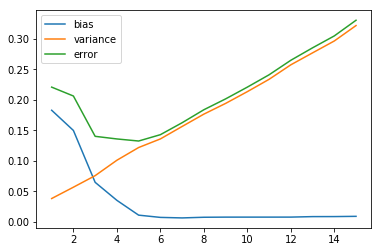

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def target_f(size):
    '''
    실제 함수값을 생성합니다.
    '''
    x = np.linspace(0, 5, size) # x값 생성
    y = 2 * np.sin(x * 1.5) # y값 생성
    
    return y
    
def sample(size, seed):
    '''
    'size' 개의 sample 생성
    '''
    # Random seed 초기화
    np.random.seed(seed)

    x = np.linspace(0, 5, size) # x값 생성  
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size) # y = 2 * sin(1.5x) + e 생성
    
    return x, y
    
def get_regression_model():
    '''
    다항 회귀 모델을 생성합니다.
    '''
    #1.TODO: Linear Regression 모델을 생성합니다.
    model = LinearRegression()

    return model
    
def fit_regression_model(model, degree, x, y):
    '''
    다항 회귀 모델을 fitting 합니다.
    '''
    #2.TODO: np.vander()를 활용하여 차수가 5인 모델을 피팅(fitting)합니다.
    fitted_model = model.fit(np.vander(x, degree + 1), y)

    return fitted_model
    
def apply_polynomial(model, x):
    '''
    input 데이터에 학습된 모델을 적용합니다.
    
    model: 다항 회귀 모델
    x: input 샘플
    '''
    degree = model.coef_.size - 1
    
    #3.TODO: 모델의 예측값을 변수 pred_y에 저장합니다.
    pred_y = model.predict(np.vander(x, degree + 1))
    
    return pred_y
    
def plot_figure(bias_list, variance_list, error_list, max_degree):
    '''
    그래프 그리기
    '''
    plt.plot(range(1, max_degree + 1), bias_list, label='bias')
    plt.plot(range(1, max_degree + 1), variance_list, label='variance')
    plt.plot(range(1, max_degree + 1), error_list, label='error')
    plt.legend()
    plt.savefig('pictures/bias_and_variance.png')

def main():
    n_samples = 50        # 모델이 한번 학습될 때의 샘플 개수 (즉, 한개의 샘플 집합의 원소수)
    max_degree = 15       # 다항 회귀식의 최고 차수
    n_sample_sets = 100   # 하나의 차수에서 모델을 학습시킬 샘플 집합의 개수

    
    # 타겟으로 삼을 y값
    target_y = target_f(n_samples)
    
    bias_list = []          # bias의 제곱을 저장
    variance_list = []      # variance 값 저장
    error_list = []         # error  저장
    for degree in range(1, max_degree + 1): # 1차 다항 회기 모델부터 15차 회기 모델까지 비교할 것입니다.
        #4.TODO: 하나의 차수에서 구한 예측값의 평균이 저장될 numpy array를 0으로 초기화합니다.
        avg_y = np.zeros(n_samples)
        
        # 각 샘플 집합에서 나온 예측값을 저장
        model_pred_list = []
        for i in range(n_sample_sets): # 한 차수에서 적용할 샘플 집합의 개수
            # x, y 샘플 가져온 뒤, 다항 회귀 모델 피팅(fitting)합니다.
            x, y = sample(n_samples, i)
            model = get_regression_model()
            fitted_model = fit_regression_model(model, degree, x, y)

            #5.TODO: 학습된 모델에서 예측값 얻어냅니다. 
            pred_y = apply_polynomial(fitted_model, x)
            
            #6.TODO: 현재 샘플 집합에서 나온 예측값을 더합니다.예측값은 model_preds에 추가합니다.
            avg_y = avg_y + pred_y
            model_pred_list.append(pred_y)
    
        #7.TODO: 전체 샘플 집합에서 얻어진 예측값의 평균을 구합니다.
        avg_y = avg_y / n_sample_sets
    
        #8.TODO: 예측값의 평균과 실제 값의 차이를 제곱하고 그 값들의 평균의 제곱근을 구합니다.
        bias = np.sqrt(np.sum(np.square(avg_y - target_y))) / target_y.size
        bias_list.append(bias)
        
        # 각 샘플 집합별로 나온 예측값의 편차의 제곱을 더한 값들을 구합니다.
        variance = 0
        for p_y in model_pred_list:
            variance = variance + np.sum(np.square(avg_y - p_y))
        
        #9.TODO: 최종 분산을 구합니다 (Hint: 한 차수에서 모델을 학습시킬 '샘플 집합의 수'와 '타깃'의 정보를 활용합니다.).
        variance = variance / (n_sample_sets * target_y.size)
        variance_list.append(variance)
    
        #10.TODO: 에러 값을 구합니다.
        error_list.append(variance + bias)
    
    return bias_list, variance_list, error_list, max_degree
    
if __name__ == "__main__":
    bias_list, variance_list, error_list, max_degree = main()
    
    # 구현한 코드가 동작된다고 판단되면 아래 줄의 주석을 풀어주세요.
    plot_figure(bias_list, variance_list, error_list, max_degree)

5.
---

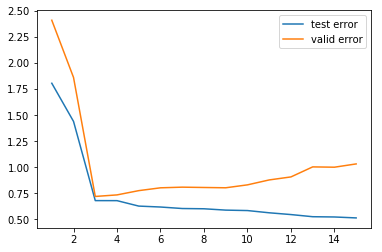

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def sample(size, seed):
    '''
    'size' 개의 sample 생성
    '''
    # Random seed 초기화
    np.random.seed(seed)
    
    x = np.linspace(0, 5, size)  
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    
    return x, y
    
def get_regression_model():
    '''
    다항 회귀 모델을 생성합니다.
    '''
    #1.TODO: Linear Regression 모델 생성합니다.
    model = LinearRegression()

    return model

def fit_regression_model(model, degree, x, y):
    '''
    다항 회귀 모델을 fitting 합니다.
    '''
    #2.TODO: np.vander()를 활용하여 차수가 5인 모델을 피팅(fitting)합니다.
    fitted_model = model.fit(np.vander(x, degree + 1), y)

    return fitted_model
    
def apply_polynomial(model, x):
    '''
    input 데이터에 학습된 모델을 적용합니다.
    
    model: 다항 회귀 모델
    x: input 샘플
    '''
    if model != None:
        degree = model.coef_.size - 1
    
    #3.TODO: 모델의 예측값을 변수 pred_y에 저장합니다.
    pred_y = model.predict(np.vander(x, degree + 1))
    
    return pred_y

def plot_figure(train_error_list, valid_error_list, max_degree):
    '''
    그래프 그리기
    '''
    plt.plot(range(1, max_degree + 1), train_error_list, label='test error')
    plt.plot(range(1, max_degree + 1), valid_error_list, label='valid error')
    plt.legend()
    plt.savefig('pictures/bias_and_variance.png')

def main():
    # Random seed
    train_seed = 9560
    test_seed = 7590
    
    #4.TODO: 샘플의 개수를 설정하고, 학습 데이터 집합(Training Set)과 검증 데이터 집합(Validation Set)을 생성합니다.  .
    n_samples = 50
    
    train_x, train_y = sample(n_samples, train_seed)
    test_x, test_y = sample(n_samples, test_seed)
    
    #5.TODO: 비교할 차수의 개수를 설정합니다.
    max_degree = 15
    
    # 학습 에러와 검증 에러가 저장됩니다.
    train_error_list = []
    valid_error_list = []
    for degree in range(1, max_degree + 1): # 1차 다항 회귀 모델부터 15차 회귀 모델까지 비교할 것입니다.
        # 학습 데이터 집합으로 다항 회귀 모델 피팅(fitting)합니다.
        model = get_regression_model()
        fitted_model = fit_regression_model(model, degree, train_x, train_y)
        
        # 학습된 모델에서 학습 데이터 집합의 입력값에 대한 예측값 얻어냅니다.
        train_pred_y = apply_polynomial(fitted_model, train_x)
        
        #6.TODO: 학습 데이터를 넣었을 때 나온 예측값과 테스트 데이터 정답 간의 에러를 구합니다.
        train_error = np.sum(np.square(train_y - train_pred_y)) / train_pred_y.size
        
        # 구한 에러(train_error)는 train_error_list에 추가합니다.
        train_error_list.append(train_error)
        
        # 학습된 모델에서 검증 데이터 집합의 입력값에 대한 예측값을 변수에 저장합니다.
        test_pred_y = apply_polynomial(fitted_model, test_x)
        
        #7.TODO: 검증 데이터를 넣었을 때 나온 예측값과 검증 데이터 정답 간의 에러를 구합니다.
        valid_error = np.sum(np.square(test_y - test_pred_y))/ test_pred_y.size
        
        # 구한 에러(valid_error)는 valid_error_list에 추가합니다.
        valid_error_list.append(valid_error)
    
    return train_error_list, valid_error_list, max_degree

if __name__ == "__main__":
    train_error_list, valid_error_list, max_degree = main()

    # 구현한 코드가 동작된다고 판단되면 아래 줄의 주석을 풀어주세요.
    plot_figure(train_error_list, valid_error_list, max_degree)

Reference
----

In [11]:
x = np.array([1, 2, 3, 5])
N = 3
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])